<a href="https://colab.research.google.com/github/Haabey/hamoye/blob/main/Hamoye_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from prophet import Prophet

In [2]:
# Load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/static/public/235/data.csv")

<ipython-input-2-d4f0ad55f483>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://archive.ics.uci.edu/static/public/235/data.csv")


In [3]:
# Explore the dataset
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# Explore the dataset
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
data.shape

(2075259, 9)

In [7]:
data.info

<bound method DataFrame.info of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0.000          1.000   
1        233.630           23.000          0.000          1.000   
2        233.290           23.000          0.000          2.000   
3        233.740           23.000          0.000          1.000   
4        235.680           15.800          0.000          1.000   
...          ...              ...            ...            ...   
2075254   240.43              4.0            0.0            0.0   
2075255    240.0              4.0            0.0            0.0   
2075256   239.82              3.8            0.0            0.0   
2075257    239.7              3.8            0.0            0.0   
2075258   239.55              3.8            0.0            0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 9 columns]>

In [8]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [9]:
# Check for missing data
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [10]:
# Print the available columns in DataFrame
print(data.columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [11]:
# Forward-fill missing values
data = data.fillna(method='ffill')

In [12]:
# Check for missing data
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
print(data['Time'].isnull().sum())  # Count missing values in 'Time' column

0


In [16]:

if 'Time' in data.columns:
    data["Time"] = data["Time"].astype(str)
    data["Time"] = pd.to_datetime(data["Time"], format='%H:%M:%S')

    # set 'Time' column as index
    data = data.set_index("Time")

# Check data types of columns and convert to numeric if necessary
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            print(f"Could not convert column {col} to numeric")

# Resample to hourly and sum
df_hourly = data.resample('H').sum()

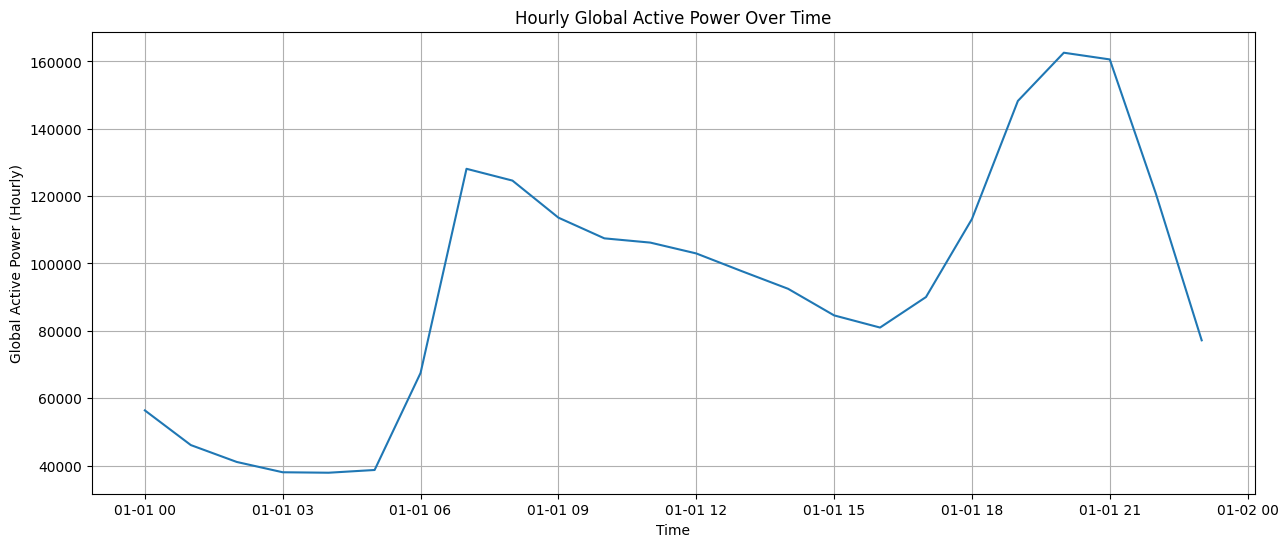

In [17]:
# Plot hourly global active power
plt.figure(figsize=(15, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (Hourly)')
plt.title('Hourly Global Active Power Over Time')
plt.grid(True)
plt.show()

In [18]:
# Calculate the Pearson correlation coefficient
correlation = data['Global_active_power'].astype(float).corr(data['Voltage'].astype(float))

# Print the result to 3 decimal places
print(f"The Pearson correlation coefficient is: {correlation:.3f}")

The Pearson correlation coefficient is: -0.400


In [19]:
# Calculate the Pearson correlation coefficient
correlation = data['Voltage'].corr(data['Global_intensity'])

# Print the result to 2 decimal places
print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: -0.41


In [22]:
# Resample to daily and sum
df_daily = data.resample('D').sum()

# Split the data into train and test sets
split_index = len(df_daily) - 300
train_df = df_daily.iloc[:split_index]
test_df = df_daily.iloc[split_index:]

In [23]:
# Rename columns for Prophet
train_df = train_df.reset_index().rename(columns={'Time': 'ds', 'Global_active_power': 'y'})
test_df = test_df.reset_index().rename(columns={'Time': 'ds', 'Global_active_power': 'y'})

In [27]:
# Resample to daily and sum
df_daily = data.resample('D').sum()

# Handle potential missing values in 'y' BEFORE splitting
df_daily['Global_active_power'].fillna(method='ffill', inplace=True)  # Forward fill missing values in the daily data

# Split the data into train and test sets (adjust split_index if needed)
split_index = int(len(df_daily) * 0.8)  # Use 80% for training
train_df = df_daily.iloc[:split_index]
test_df = df_daily.iloc[split_index:]

# Rename columns for Prophet
train_df = train_df.reset_index().rename(columns={'Time': 'ds', 'Global_active_power': 'y'})
test_df = test_df.reset_index().rename(columns={'Time': 'ds', 'Global_active_power': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(train_df)

ValueError: Dataframe has less than 2 non-NaN rows.

In [28]:
# Make predictions on the test set
forecast = model.predict(test_df)

Exception: Model has not been fit.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(test_df['y'], forecast['yhat'])

# Print MAPE with 2 decimal places
print(f"MAPE: {mape:.2f}%")

In [ ]:
# Make predictions on the test set (if not already done)
forecast = model.predict(test_df)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

# Print RMSE with 2 decimal places
print(f"RMSE: {rmse:.2f}")

In [ ]:
# Plot the components of the forecast
model.plot_components(forecast)

In [ ]:
# Rename columns for Prophet and regressors
df_daily = df.resample('D', on='Time').sum()
df_daily = df_daily.reset_index().rename(columns={'Time': 'ds',
                                                    'Global_active_power': 'y',
                                                    'Global_reactive_power': 'add1',
                                                    'Voltage': 'add2',
                                                    'Global_intensity': 'add3',
                                                    'Sub_metering_1': 'add4',
                                                    'Sub_metering_2': 'add5',
                                                    'Sub_metering_3': 'add6'})

# Split the data into train and test sets
split_index = len(df_daily) - 300
train_df = df_daily.iloc[:split_index]
test_df = df_daily.iloc[split_index:]

In [ ]:
# Create the Prophet model
model = Prophet()

# Add regressors
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

# Fit the model
model.fit(train_df)

In [ ]:
# Rename columns for Prophet and regressors
df_daily = df.resample('D', on='Time').sum()
df_daily = df_daily.reset_index().rename(columns={'Time': 'ds',
                                                    'Global_active_power': 'y',
                                                    'Global_reactive_power': 'add1',
                                                    'Voltage': 'add2',
                                                    'Global_intensity': 'add3',
                                                    'Sub_metering_1': 'add4',
                                                    'Sub_metering_2': 'add5',
                                                    'Sub_metering_3': 'add6'})

# Split the data into train and test sets
split_index = len(df_daily) - 300
train_df = df_daily.iloc[:split_index]
test_df = df_daily.iloc[split_index:]

In [ ]:
# Create the Prophet model
model = Prophet()

# Add regressors
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

# Fit the model
model.fit(train_df)

In [ ]:
# Make predictions on the test set
forecast = model.predict(test_df)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(test_df['y'], forecast['yhat'])

# Print MAPE with 2 decimal places
print(f"MAPE: {mape:.2f}%")

In [ ]:
# Calculate RMSE
rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

# Print RMSE with 2 decimal places
print(f"RMSE: {rmse:.2f}")

In [ ]:
# Plot the components of the forecast
model.plot_components(forecast)